<h3 STYLE="background: #c2edff;padding: 0.5em;">Step 4. 実データの読み込みから俯瞰まで</h3>

<ol>
<li><a href="#1">「ワインの品質」データ読み込み</a>
<li><a href="#2">ヒストグラム</a>
<li><a href="#3">散布図</a>
<li><a href="#4">散布図行列</a>
<li><a href="#5">相関行列</a>
<li><a href="#6">練習</a>
</ol>

In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [2]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="1">1. 「ワインの品質」データ読み込み</a></h3>

データは <a href="http://archive.ics.uci.edu/ml/index.php" target="_blank">UC Irvine Machine Learning Repository</a> から取得したものを少し改変しました。

* 赤ワイン https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt

* 白ワイン https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-white.txt

<h4 style="border-bottom: solid 1px black;">　<a href="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names">詳細</a></h4>

<ol>
<li>fixed acidity
<li>volatile acidity
<li>citric acid
<li>residual sugar
<li>chlorides
<li>free sulfur dioxide
<li>total sulfur dioxide
<li>density
<li>pH
<li>sulphates
<li>alcohol
   Output variable (based on sensory data): 
<li>quality (score between 0 and 10)
</ol>

In [3]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'winequality-red.csv') # Python 2 の場合
urllib.request.urlretrieve(url, 'winequality-red.txt') # Python 3 の場合

('winequality-red.txt', <http.client.HTTPMessage at 0x10651fda0>)

In [4]:
# データの読み込み
df1 = pd.read_csv('winequality-red.txt', sep='\t', index_col=0) 

In [5]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15,59,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15,21,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9,18,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17,102,0.99780,3.35,0.80,10.5,5


In [6]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000,7.3000,7.8000,7.5000,...,6.6000,6.30000,5.40000,6.30000,6.80000,6.2000,5.90000,6.30000,5.90000,6.00000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000,0.6500,0.5800,0.5000,...,0.7250,0.55000,0.74000,0.51000,0.62000,0.6000,0.55000,0.51000,0.64500,0.31000
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600,0.0000,0.0200,0.3600,...,0.2000,0.15000,0.09000,0.13000,0.08000,0.0800,0.10000,0.13000,0.12000,0.47000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000,1.2000,2.0000,6.1000,...,7.8000,1.80000,1.70000,2.30000,1.90000,2.0000,2.20000,2.30000,2.00000,3.60000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690,0.0650,0.0730,0.0710,...,0.0730,0.07700,0.08900,0.07600,0.06800,0.0900,0.06200,0.07600,0.07500,0.06700
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000,15.0000,9.0000,17.0000,...,29.0000,26.00000,16.00000,29.00000,28.00000,32.0000,39.00000,29.00000,32.00000,18.00000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000,21.0000,18.0000,102.0000,...,79.0000,35.00000,26.00000,40.00000,38.00000,44.0000,51.00000,40.00000,44.00000,42.00000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978,...,0.9977,0.99314,0.99402,0.99574,0.99651,0.9949,0.99512,0.99574,0.99547,0.99549
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000,3.3900,3.3600,3.3500,...,3.2900,3.32000,3.67000,3.42000,3.42000,3.4500,3.52000,3.42000,3.57000,3.39000
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600,0.4700,0.5700,0.8000,...,0.5400,0.82000,0.56000,0.75000,0.82000,0.5800,0.76000,0.75000,0.71000,0.66000


In [7]:
df1['fixed acidity'].tolist()

[7.4000000000000004,
 7.7999999999999998,
 7.7999999999999998,
 11.199999999999999,
 7.4000000000000004,
 7.4000000000000004,
 7.9000000000000004,
 7.2999999999999998,
 7.7999999999999998,
 7.5,
 6.7000000000000002,
 7.5,
 5.5999999999999996,
 7.7999999999999998,
 8.9000000000000004,
 8.9000000000000004,
 8.5,
 8.0999999999999996,
 7.4000000000000004,
 7.9000000000000004,
 8.9000000000000004,
 7.5999999999999996,
 7.9000000000000004,
 8.5,
 6.9000000000000004,
 6.2999999999999998,
 7.5999999999999996,
 7.9000000000000004,
 7.0999999999999996,
 7.7999999999999998,
 6.7000000000000002,
 6.9000000000000004,
 8.3000000000000007,
 6.9000000000000004,
 5.2000000000000002,
 7.7999999999999998,
 7.7999999999999998,
 8.0999999999999996,
 5.7000000000000002,
 7.2999999999999998,
 7.2999999999999998,
 8.8000000000000007,
 7.5,
 8.0999999999999996,
 6.7999999999999998,
 4.5999999999999996,
 7.7000000000000002,
 8.6999999999999993,
 6.4000000000000004,
 5.5999999999999996,
 8.8000000000000007,
 6.5

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="2">2. ヒストグラム</a></h3>

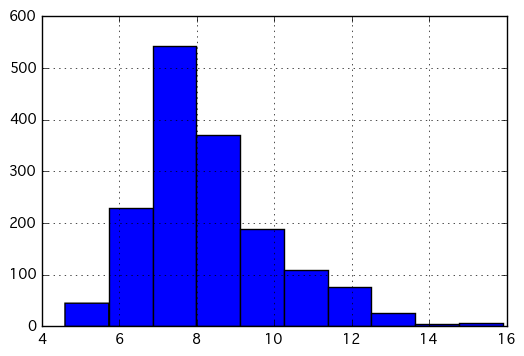

In [8]:
%matplotlib inline
df1['fixed acidity'].hist()

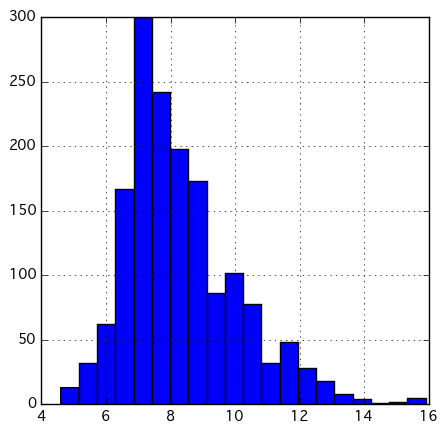

In [9]:
%matplotlib inline
df1['fixed acidity'].hist(figsize=(5, 5), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109889a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109e8d080>]], dtype=object)

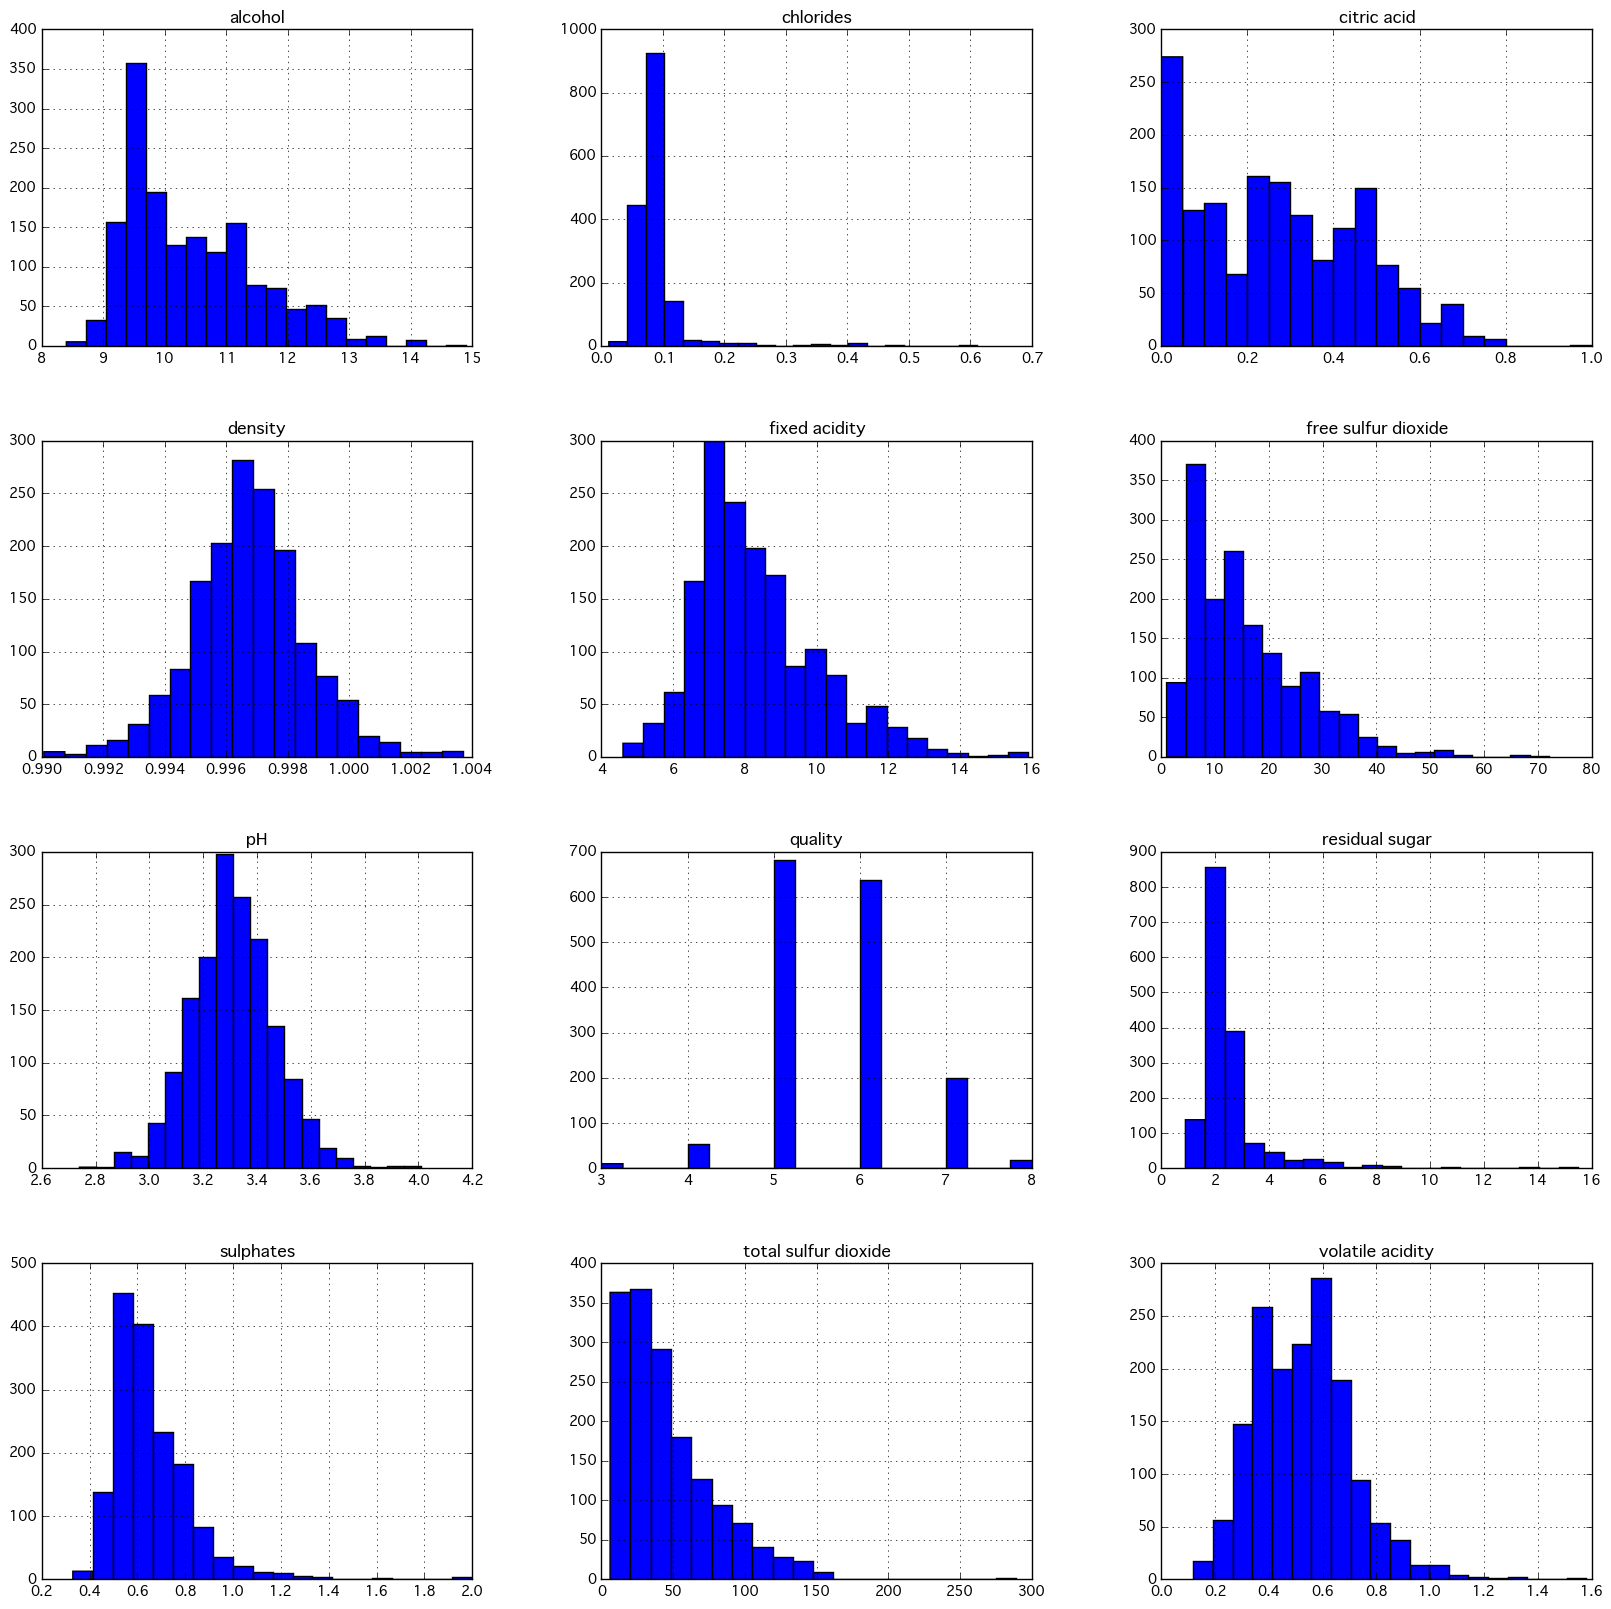

In [10]:
%matplotlib inline
df1.hist(figsize=(20, 20), bins=20)

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="3">3. 散布図</a></h3>

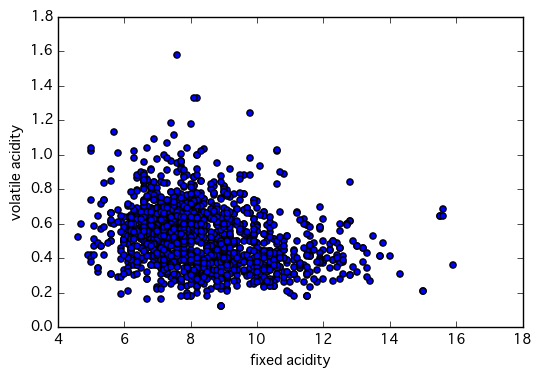

In [11]:
df1.plot(kind='scatter', x=u'fixed acidity', y=u'volatile acidity')

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="4">4. 散布図行列</a></h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109bcd2b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1107b7048>]], dtype=object)

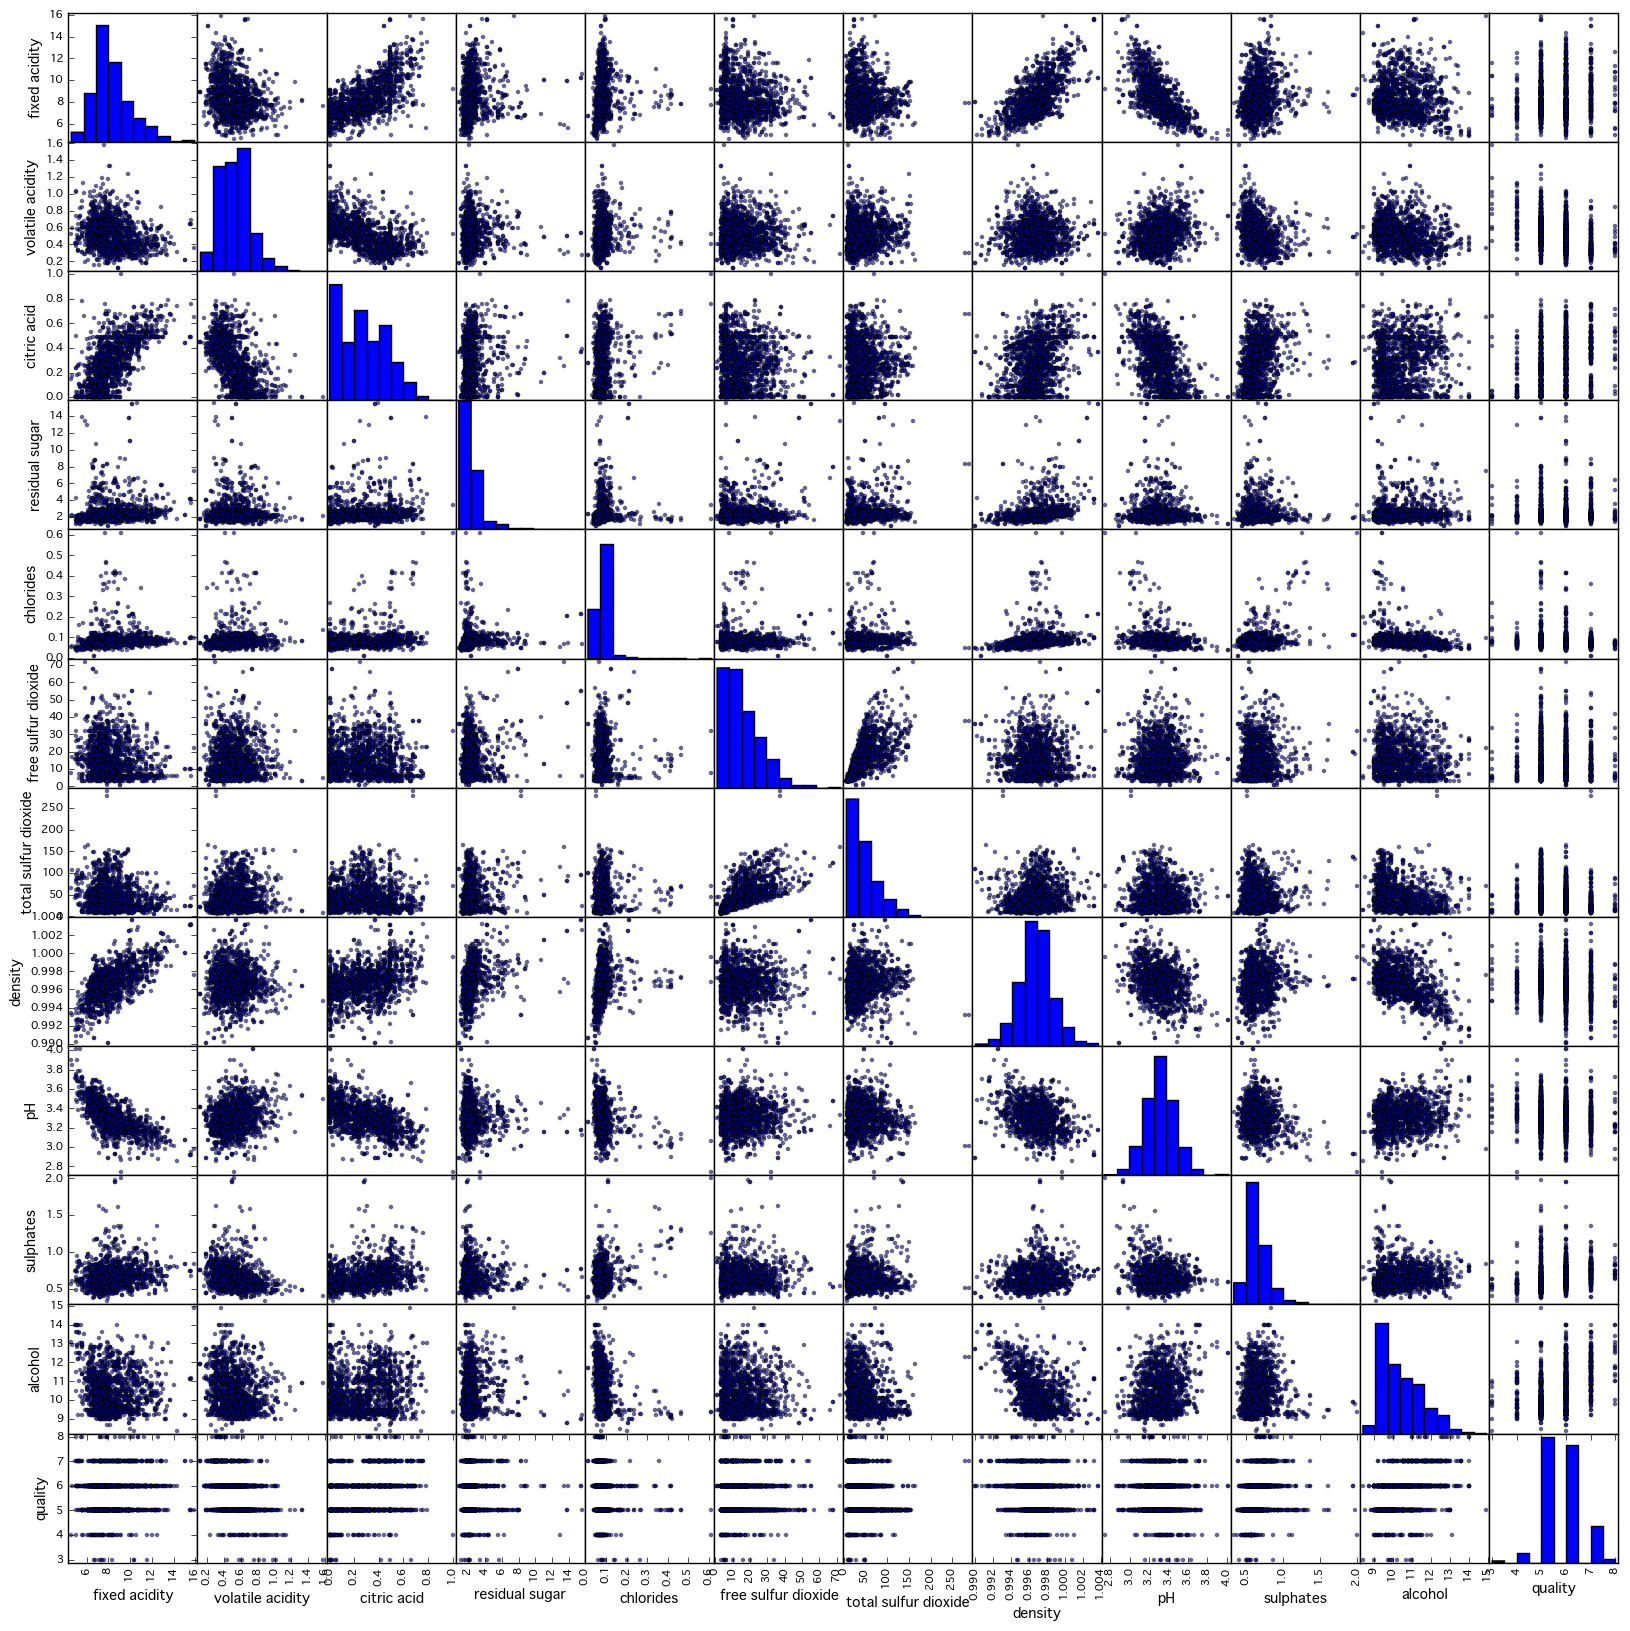

In [12]:
from pandas.tools import plotting # 高度なプロットを行うツールのインポート
plotting.scatter_matrix(df1.dropna(axis=1)[df1.columns[:]], figsize=(20, 20)) 

<h3 STYLE="background: #c2edff;padding: 0.5em;"><a name="5">5. 相関行列</a></h3>

In [13]:
pd.DataFrame(np.corrcoef(df1.T.dropna().iloc[:, :].as_matrix().tolist()), 
             columns=df1.columns, index=df1.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


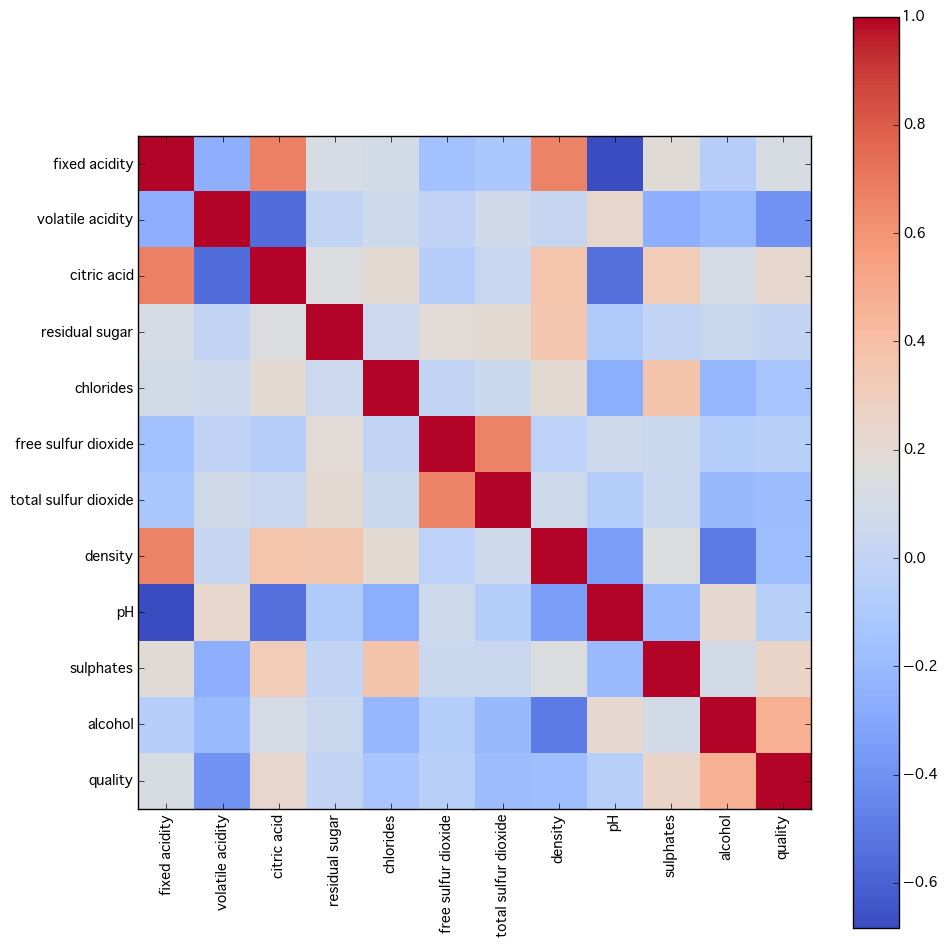

In [14]:
import matplotlib.pyplot as plt
corrcoef = np.corrcoef(df1.dropna().iloc[:, :].T.as_matrix().tolist())
plt.figure(figsize=(10, 10))
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df1.columns, rotation=90)
plt.yticks(tick_marks, df1.columns)
plt.tight_layout()

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;"><a name="6">練習4.1</a></h4>

白ワインのデータ(https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-white.txt) を読み込み、ヒストグラム、散布図行列、相関行列を描いてください。

In [15]:
# 練習4.1